
Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [11]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from palmerpenguins import load_penguins
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import plotnine as plt
from plotnine import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [12]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [13]:
X = ha.drop("cp", axis = 1)
y= ha["cp"]

## KNN

In [ ]:
param_grid = {
    "knn__n_neighbors": list(range(5, 100)),  # From 5 to 100 in steps of 5
    "knn__weights": ["uniform", "distance"],  # Different weighting schemes
    "knn__p": [1, 2]  # 1 for Manhattan, 2 for Euclidean distance
}


# Define the preprocessing step
ct = ColumnTransformer(
    [
        ("dummify", 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize", 
         StandardScaler(), 
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

# Define the pipeline for KNN
knn_pipeline = Pipeline(
    [("preprocessing", ct),
     ("knn", KNeighborsClassifier())]  # Default classifier
)

# Set up GridSearchCV
#grid_search = GridSearchCV(knn_pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV


grid_search = GridSearchCV(
    knn_pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=5),  # Ensures proper class distribution
    scoring="roc_auc_ovr",
    n_jobs=-1
)


grid_search.fit(X, y)

# Evaluate the results
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-validated ROC AUC: {grid_search.best_score_:.4f}")

y_pred = grid_search.best_estimator_.predict(X)

print("Classification Report:")
print(classification_report(y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))

Best Parameters: {'knn__n_neighbors': 92, 'knn__p': 1, 'knn__weights': 'distance'}
Best Cross-validated ROC AUC: 0.6809
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       128
           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        81
           3       1.00      1.00      1.00        20

    accuracy                           1.00       273
   macro avg       1.00      1.00      1.00       273
weighted avg       1.00      1.00      1.00       273

Confusion Matrix:
[[128   0   0   0]
 [  0  44   0   0]
 [  0   0  81   0]
 [  0   0   0  20]]


c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast


## LDA 

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

param_grid = {
    "lda__solver": ["svd", "lsqr", "eigen"],  # Different solvers for LDA
    "lda__priors": [None, "uniform"],  # Uniform priors or None (learned from the data)
    "lda__n_components": [1, 2, 3],  # Different number of components (for dimensionality reduction)
    "lda__shrinkage": [None, "auto", 0.1, 0.2],  # Only applicable if solver="lsqr"
    "lda__tol": [1e-4, 1e-3, 1e-2]  # Different tolerance levels
}



# Define the preprocessing step
ct = ColumnTransformer(
    [
        ("dummify", 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize", 
         StandardScaler(), 
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

# Define the pipeline for KNN
lda_pipeline = Pipeline(
    [("preprocessing", ct),
     ("lda", LinearDiscriminantAnalysis())]  # Default classifier
)

# Set up GridSearchCV


# Fit the GridSearchCV


grid_search = GridSearchCV(
    lda_pipeline,
    param_grid,
    cv=StratifiedKFold(n_splits=5),  # Ensures proper class distribution
    scoring="accuracy",
    n_jobs=-1
)


grid_search.fit(X, y)

# Evaluate the results
print("Best Parameters:", grid_search.best_params_)
print(f"Best Cross-validated accuracy: {grid_search.best_score_:.4f}")

y_pred = grid_search.best_estimator_.predict(X)

print("Classification Report:")
print(classification_report(y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))



Best Parameters: {'lda__n_components': 1, 'lda__priors': None, 'lda__shrinkage': 'auto', 'lda__solver': 'lsqr', 'lda__tol': 0.0001}
Best Cross-validated accuracy: 0.5533
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.77      0.74       128
           1       0.25      0.05      0.08        44
           2       0.44      0.68      0.54        81
           3       0.40      0.10      0.16        20

    accuracy                           0.58       273
   macro avg       0.45      0.40      0.38       273
weighted avg       0.54      0.58      0.53       273

Confusion Matrix:
[[98  2 27  1]
 [ 8  2 32  2]
 [22  4 55  0]
 [ 8  0 10  2]]


c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
675 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
135 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\hblin\Ap

## Decision Tree

In [93]:
param_grid = {
    "dt__max_depth": [3, 5, 7, 10, None],  # Vary max depth of the tree
    "dt__min_samples_split": [2, 5, 10],  # Vary minimum samples to split
    "dt__min_samples_leaf": [1, 2, 4],    # Vary minimum samples per leaf
    "dt__criterion": ["gini", "entropy"]  # Vary the splitting criterion
}

# Define the pipeline with DecisionTreeClassifier
dt_pipeline = Pipeline(
    [("preprocessing", ct),
     ("dt", DecisionTreeClassifier(random_state=52))]
)

# Set up GridSearchCV for cross-validation and hyperparameter search
grid_search = GridSearchCV(dt_pipeline, param_grid, cv=StratifiedKFold(n_splits=5), scoring='roc_auc_ovr', n_jobs=-1)

# Fit the GridSearchCV with your data
grid_search.fit(X, y)

# Retrieve and print the best parameters from the grid search
print("Best Parameters:", grid_search.best_params_)

# Retrieve and print the best cross-validated ROC AUC score
print(f"Best Cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Use the best model to predict on the same dataset for exploration
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

# Evaluate predictions (optional)
print("Classification Report on Entire Dataset:")
print(classification_report(y, y_pred))

cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)
transformed_X = ct.fit_transform(X)



Best Parameters: {'dt__criterion': 'gini', 'dt__max_depth': 3, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 5}
Best Cross-validated ROC AUC: 0.6583
Classification Report on Entire Dataset:
              precision    recall  f1-score   support

           0       0.69      0.83      0.75       128
           1       0.00      0.00      0.00        44
           2       0.48      0.59      0.53        81
           3       0.42      0.40      0.41        20

    accuracy                           0.59       273
   macro avg       0.40      0.46      0.42       273
weighted avg       0.50      0.59      0.54       273

Confusion Matrix:
[[106   0  19   3]
 [ 12   0  30   2]
 [ 27   0  48   6]
 [  8   0   4   8]]


c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


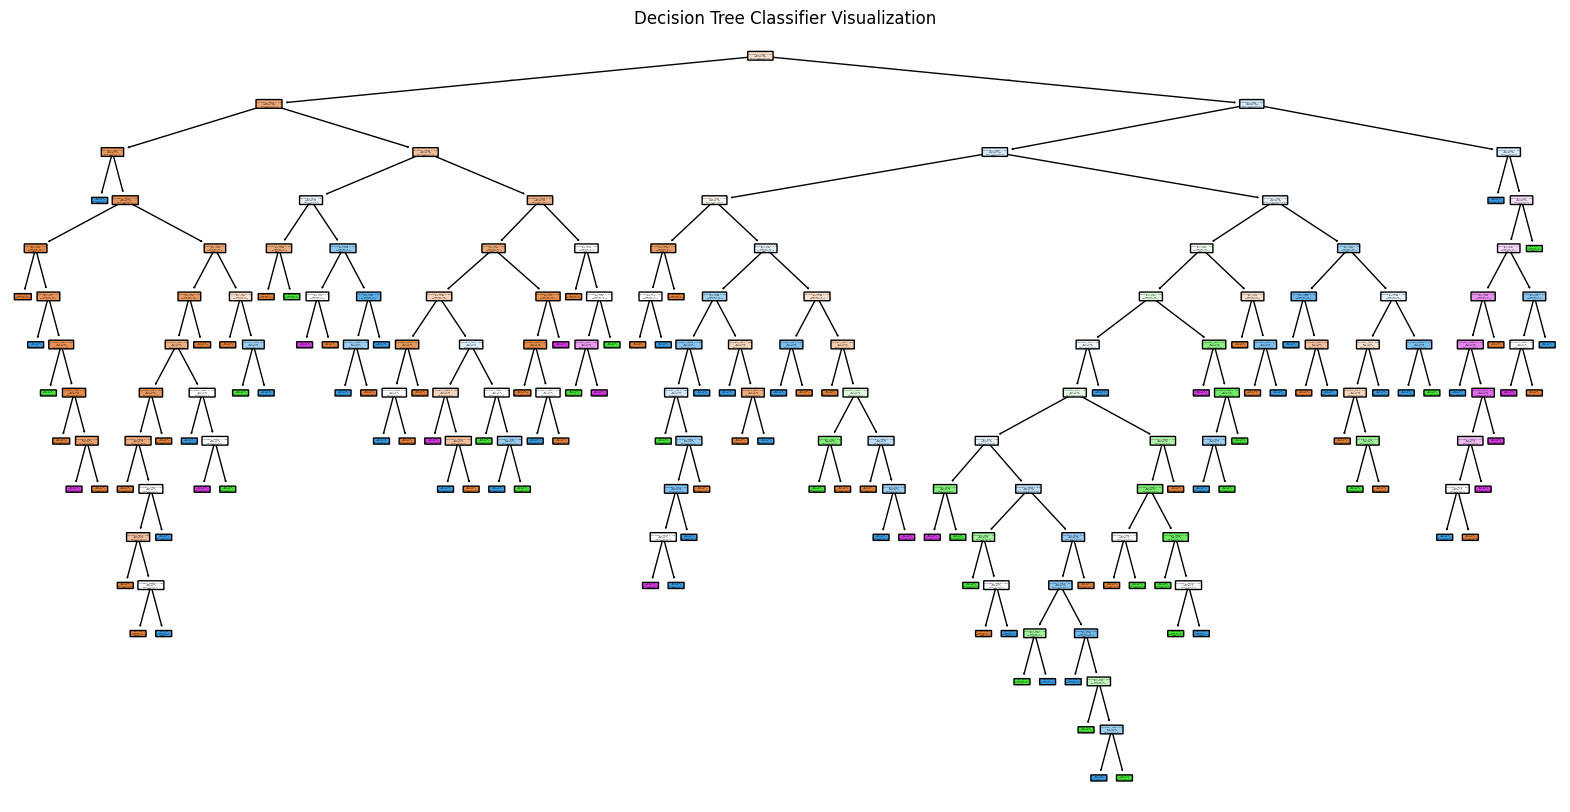

In [94]:
dt_pipeline = Pipeline(
    [("preprocessing", ct),
     ("dt", DecisionTreeClassifier(random_state=52))]
)

dtpipeline = dt_pipeline.fit(X,y)

decision_tree = dt_pipeline.named_steps['dt']

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(
    decision_tree,
    filled=True,
    feature_names=dt_pipeline.named_steps['preprocessing'].get_feature_names_out(),
    class_names=decision_tree.classes_.astype(str),
    rounded=True,
    proportion=False,
    precision=2
)
plt.title("Decision Tree Classifier Visualization")
plt.show()


## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [63]:
ha['cp_is_3'] = (ha['cp'] == 3).astype(int)
ha['cp_is_2'] = (ha['cp'] == 2).astype(int)
ha['cp_is_1'] = (ha['cp'] == 1).astype(int)
ha['cp_is_0'] = (ha['cp'] == 0).astype(int)
X_ovr = ha.drop(["cp", "cp_is_2","cp_is_1","cp_is_0"], axis = 1)

y_ovr = ha['cp_is_0']

In [64]:
param_grid = {
    "lgr__C": [0.001, 0.1, 1, 10, 100],  # Regularization strength
    "lgr__penalty": ["l2"],  # L2 penalty (regularization term)
    "lgr__solver": ["lbfgs", "liblinear"],  # Different solvers
}

# Define the preprocessing step
ct = ColumnTransformer(
    [
        ("dummify", 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize", 
         StandardScaler(), 
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

# Define the pipeline for Logistic Regression
lgr_pipeline = Pipeline(
    [("preprocessing", ct),
     ("lgr", LogisticRegression())]  # Default classifier
)
cv=StratifiedKFold(n_splits=5)
# Set up GridSearchCV
grid_search = GridSearchCV(lgr_pipeline, param_grid, cv=cv, scoring='roc_auc_ovr', n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_ovr, y_ovr)

# Retrieve and print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Retrieve and print the cross-validated ROC AUC for the best model
print(f"Best Cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Use the best model to predict on the same dataset for exploration
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_ovr)

# Evaluate predictions (optional)
print("Classification Report on Entire Dataset:")
print(classification_report(y_ovr, y_pred))

cm = confusion_matrix(y_ovr, y_pred)
print("Confusion Matrix:")
print(cm)

TN, FP, FN, TP = cm.ravel()

# Calculate the True Negative Rate (TNR) or Specificity
tnr = TN / (TN + FP)
print(f"True Negative Rate (Specificity): {tnr:.4f}") 

Best Parameters: {'lgr__C': 1, 'lgr__penalty': 'l2', 'lgr__solver': 'liblinear'}
Best Cross-validated ROC AUC: 0.8351
Classification Report on Entire Dataset:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80       145
           1       0.77      0.77      0.77       128

    accuracy                           0.78       273
   macro avg       0.78      0.78      0.78       273
weighted avg       0.78      0.78      0.78       273

Confusion Matrix:
[[116  29]
 [ 30  98]]
True Negative Rate (Specificity): 0.8000


## F1 Scores:

It seems that the model is best at predicting class 0's

3: 0

2: .42

1: 0

0: .77

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [90]:
ha_ovo = ha

ha_ovo = ha_ovo[ha_ovo['cp'].isin([0, 2])]

In [91]:
X_ovo = ha_ovo.drop(["cp"], axis = 1)

y_ovo = ha_ovo['cp']

In [96]:
param_grid = {
    "lgr__C": [0.001, 0.1, 1, 10, 100],  # Regularization strength
    "lgr__penalty": ["l2"],  # L2 penalty (regularization term)
    #"lgr__solver": ["lbfgs", "liblinear"],  # Different solvers
}

# Define the preprocessing step
ct = ColumnTransformer(
    [
        ("dummify", 
         OneHotEncoder(sparse_output=False, handle_unknown='ignore'),
         make_column_selector(dtype_include=object)),
        ("standardize", 
         StandardScaler(), 
         make_column_selector(dtype_include=np.number))
    ],
    remainder="passthrough"
).set_output(transform="pandas")

# Define the pipeline for Logistic Regression
lgr_pipeline = Pipeline(
    [("preprocessing", ct),
     ("lgr", LogisticRegression())]  # Default classifier
)
cv=StratifiedKFold(n_splits=5)
# Set up GridSearchCV
grid_search = GridSearchCV(lgr_pipeline, param_grid, cv=cv, scoring='roc_auc_ovo', n_jobs=-1)

# Fit the GridSearchCV
grid_search.fit(X_ovo, y_ovo)

# Retrieve and print the best parameters
print("Best Parameters:", grid_search.best_params_)

# Retrieve and print the cross-validated ROC AUC for the best model
print(f"Best Cross-validated ROC AUC: {grid_search.best_score_:.4f}")

# Use the best model to predict on the same dataset for exploration
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_ovo)

# Evaluate predictions (optional)
print("Classification Report on Entire Dataset:")
print(classification_report(y_ovo, y_pred))

cm = confusion_matrix(y_ovo, y_pred)
print("Confusion Matrix:")
print(cm)

# TN, FP, FN, TP = cm.ravel()

# # Calculate the True Negative Rate (TNR) or Specificity
# tnr = TN / (TN + FP)
# print(f"True Negative Rate (Specificity): {tnr:.4f}") 

Best Parameters: {'lgr__C': 0.001, 'lgr__penalty': 'l2'}
Best Cross-validated ROC AUC: 1.0000
Classification Report on Entire Dataset:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       128
           2       0.00      0.00      0.00        81

    accuracy                           0.61       209
   macro avg       0.31      0.50      0.38       209
weighted avg       0.38      0.61      0.47       209

Confusion Matrix:
[[128   0]
 [ 81   0]]


c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
c:\Users\hblin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


ROC AUCS:

0-1: 1

0-2: 1

0-3: 1